# Aviation Accidents - Risk Analysis

**Author**: Endalkachew Dessalegne

   ![img](./images/image-aircraft1.jpg)

## Overview
The company is planning to expand to the aviation industry by purchasing and operating airplanes for commercial and private enterprises. This project uses descriptive statistical analysis on aviation accident data from Kaggle to gain insight into which aircraft is with the lowest risk. It analyzes aviation accidents data to find out the potential risks of purchasing different aircrafts and recommend which aircraft to purchase. This require insight into which types of aircrafts are with the lowest risk. That is by analyzing how make and model of aircrafts, number and type of engines relate to accidents and injuries and damages caused by aircraft accidents which occurred within the United States, its territories and possessions, and in international waters. The data analysis generally shows that as aircraft's number of engines increases the number of accidents and injuries and damages decreases. It also shows that aircrafts with certain types of engine type are more involved in accidents than the others. This engine types includes Reciprocating engine. Moreover, some aircraft Make such as Cessna and its Models 172 and 152 are shown to be involved in accidents more than others. The data analysis also shows that how combination of different factors affects risk of accidents. My recommendation for which type of aircraft to purchase would be to focus on the number and type of engines of the aircrafts. Most importantly, avoid some combination of factors such as Cessna Make, Reciprocating type and one engine, which has the highest number of accidents and injuries recorded.

## Business Problem

The company wants to expand into the aviation industry and wants to purchase aircrafts with the lowest risk in order to maximize profit. To determine this, aviation accident dataset was analyzed to find out which factors incrase or decrease the risk of aviation accidents so as to gain an insight to which type of aircraft to purchase for the company to minimize risk and maximize profit.

## Data Understanding

The data analyzed came from The NTSB aviation accident database from on Kaggle website. It contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. I used one file to get an insight on how aircraft Make and Model, and number and type of engine correlates with number of accidents, fatal and serious injuries and damage to aircraft.

In [561]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [581]:
#store the data in a variable aviation_df
aviation_df = pd.read_csv('data/AviationData.csv', encoding='latin-1', low_memory=False)

In [582]:
# view the first five rows
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [583]:
# summary of the data 
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [584]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


***
* The data represents aviation acccidents from 1962 and consists of aircraft categories, 
  make, model, number and type of engines of aircrafts involved in the acccidents.
* It consists of 88,889 entries or rows and 31 columns or variables
* It consists of injuries and damages levels caused by the accidents in different columns.
* The variables such as make and model of aircrafts and type and number of engines of aircraf in relation to the injuries and
  damages will be analyzed. 
***



## Data Preparation
## Data Cleaning

In [586]:
# Make column names easier to use by striping the '.' and replace with '_' and lower case
aviation_df.columns = aviation_df.columns.str.lower().str.replace('.', '_')

In [587]:
#get list of columns
aviation_df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

### Drop columns

The dataset consists of columns with a lot of missing values and which are less valueable in this analysis.
 

In [588]:
# Drop unnecessary columns
aviation_df = aviation_df.drop(['event_id', 'accident_number', 'location', 'air_carrier', 'latitude', 'longitude', 'airport_code', 'airport_name', 'registration_number',\
                                        'far_description', 'schedule', 'air_carrier', 'report_status', 'publication_date'], axis=1)

In [589]:
aviation_df.head()

,investigation_type,event_date,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,1948-10-24,United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [590]:
# get the columns and the number of null values in each column
aviation_df.isnull().sum()

investigation_type            0
event_date                    0
country                     226
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
dtype: int64

Now, columns are dropped, I deal with null values in each column. 

## Dealing with missing values

* I checked columns for proportion of missing values and value counts of each unique value to decide on missing values.


In [592]:
"""
* I checked columns for proportion of missing values and value counts of each unique value to decide on missing values.
* Some columns are missing insignicant number of values, dropping this missing values will not affect the dataset.
"""
#code to drop value missing rows
aviation_df = aviation_df.dropna(subset=['country', 'injury_severity', 'aircraft_damage','make', 'model','amateur_built'])

In [593]:
# uppdate the list of null values
aviation_df.isnull().sum()

investigation_type            0
event_date                    0
country                       0
injury_severity               0
aircraft_damage               0
aircraft_category         54522
make                          0
model                         0
amateur_built                 0
number_of_engines          4451
engine_type                5343
purpose_of_flight          4032
total_fatal_injuries      10843
total_serious_injuries    12089
total_minor_injuries      11377
total_uninjured            5737
weather_condition          2825
broad_phase_of_flight     24822
dtype: int64


**I replace missing values in categorical data columns with the most common values or with 'Unknown'**

I go through the `value_counts` of unique values of each column and decide how to deal with missing values.

I dropped aircraft_catrgory column since it conists more than 64 percent of missing values.


In [594]:
#drop aircraft column
aviation_df = aviation_df.drop('aircraft_category', axis=1)

***
Now I deal with numerical columns with missing values

Replace missing values, in the columns with float datatype, with the **median** values

***

In [595]:
#first, get value_counts of "number_of_engines"
aviation_df['number_of_engines'].value_counts()

1.0    68973
2.0     9690
0.0     1088
3.0      321
4.0      304
8.0        2
6.0        1
Name: number_of_engines, dtype: int64

In [596]:
# replace the NaN values with the most common value 1.0 
aviation_df['number_of_engines'] = aviation_df['number_of_engines'].fillna(1.0)
""" 
# Engine number is not going to be used in numerical equations rather considered as a category
#The nmber_of_engines column must be changed to string type insted (first it is changed in to intiger to remove decimals)
"""
#change data type to object/string
aviation_df['number_of_engines'] = aviation_df['number_of_engines'].astype(int).astype(str)

* For all the other float data type columns, NaN values are replaced with the Median value of the column

In [598]:
# Code to repalce values with median value
aviation_df = aviation_df.fillna(aviation_df.median())

In [599]:
#update the data on null values
aviation_df.isnull().sum()

investigation_type            0
event_date                    0
country                       0
injury_severity               0
aircraft_damage               0
make                          0
model                         0
amateur_built                 0
number_of_engines             0
engine_type                5343
purpose_of_flight          4032
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition          2825
broad_phase_of_flight     24822
dtype: int64

In [600]:
#value counts for engine type
aviation_df['engine_type'].value_counts()

Reciprocating      69017
Turbo Shaft         3433
Turbo Prop          3123
Unknown             1802
Turbo Fan           1547
Turbo Jet            535
None                  16
Electric               8
NONE                   2
Hybrid Rocket          1
UNK                    1
Geared Turbofan        1
LR                     1
Name: engine_type, dtype: int64

In [601]:
#Column -'engine_type'
"""
replace values 'None', 'NONE', 'UNK' which are the same but considered different to 'Unknown'
strip and replace unwanted characters for uniformity
replace null values with the most common category 'Reciprocating'

"""

aviation_df['engine_type'].replace(['None', 'NONE', 'UNK'], 'Unknown', inplace=True)

#strip and replace unwanted characters for consistancy
aviation_df['engine_type'] = aviation_df['engine_type'].str.title().str.replace(' ', '_')

#code to fill in with the most common value - 'Reciprocating'
aviation_df['engine_type'] = aviation_df['engine_type'].fillna('Reciprocating')


In [602]:
#value counts for purpose of flight
aviation_df['purpose_of_flight'].value_counts()

Personal                     48975
Instructional                10506
Unknown                       5861
Aerial Application            4695
Business                      3908
Positioning                   1584
Other Work Use                1203
Ferry                          801
Aerial Observation             766
Public Aircraft                705
Executive/corporate            518
Flight Test                    391
Skydiving                      178
External Load                  115
Public Aircraft - Federal      102
Banner Tow                     101
Air Race show                   90
Public Aircraft - Local         70
Public Aircraft - State         60
Air Race/show                   56
Glider Tow                      53
Firefighting                    38
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: purpose_of_flight, dtype: int64

In [603]:
#strip and replace for uniformity and to avoid different naming of the same variable
aviation_df['purpose_of_flight'] = aviation_df['purpose_of_flight'].str.strip().str.replace('/','_').str.replace(' - ','_').str.replace(' ', '_')

In [604]:
#Column_name : 'Purpose of flight'
#code to fill in with value - 'Unknown' - which is already in the list
aviation_df['purpose_of_flight'] = aviation_df['purpose_of_flight'].fillna('Unknown')

In [605]:
#value counts for weather_condtion
aviation_df['weather_condition'].value_counts()

VMC    75291
IMC     5736
UNK      784
Unk      194
Name: weather_condition, dtype: int64

In [606]:
""" 
Column_name : 'Weather Condition'
Unk and UNK must be formated the to represent the same value - Unknown
"""

#code to fill in with common value 'VMC' 
aviation_df['weather_condition'] = aviation_df['weather_condition'].str.strip().str.upper()
aviation_df['weather_condition'] = aviation_df['weather_condition'].fillna('VMC')

In [607]:
#value counts for broad_phase_of_flight
aviation_df['broad_phase_of_flight'].value_counts()

Landing        15147
Takeoff        12288
Cruise          9886
Maneuvering     8073
Approach        6406
Climb           1903
Taxi            1853
Descent         1712
Go-around       1344
Standing         745
Unknown          538
Other            113
Name: broad_phase_of_flight, dtype: int64

In [608]:
#Column_name : 'broad_phase_of_flight'
#code to fill in with common value 'Unknown'
aviation_df['broad_phase_of_flight'] = aviation_df['broad_phase_of_flight'].fillna('Unknown')

In [609]:
#strip and replace categorical value strings which is not in consistent formating
aviation_df['make'] = aviation_df['make'].str.strip().str.lower().str.replace(' ', '_')
aviation_df['model'] = aviation_df['model'].str.strip().str.lower().str.replace(' ', '_')



* Fom the 'event_date' column, I extract 'event_year' to a new column which later be used to see the trend in accidents over the years.

In [610]:
# the event_date column changed to datetime format first
aviation_df['event_date'] = pd.to_datetime(aviation_df['event_date'])

# extract the year from the event_date
aviation_df['event_year'] = aviation_df['event_date'].dt.year.astype(str)

***
* I, once again, check for update on missing values.
***

In [611]:
aviation_df.isnull().sum()

investigation_type        0
event_date                0
country                   0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
event_year                0
dtype: int64



* Now all missing values are cleared, I add new column of 'total_injuries' putting together 'total_fatal_injuries' and 'total_serious_injuries' and excluding total_minor injuries because of their relative importance.


In [612]:
# create new column 'total_injuries'
aviation_df['total_injuries'] = aviation_df['total_fatal_injuries'] + aviation_df['total_serious_injuries']

In [613]:
#store the cleaned data in a new valriable cleaned_aviation_df
cleaned_aviation_df = aviation_df

In [614]:
# Save cleaned dataset as csv
cleaned_aviation_df.to_csv('./data/cleaned_aviation_df.csv')

## Data Analysis

In [615]:
# get summary statistics
cleaned_aviation_df.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,total_injuries
count,84830.000000,84830.000000,84830.000000,84830.000000,84830.000000
mean,0.569457,0.233325,0.302322,3.280019,0.802782
std,4.909513,1.399208,2.082244,20.318758,5.263598
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000
max,295.000000,161.000000,380.000000,699.000000,295.000000


### Accidents over the years
First, I check the trend of aircraft accidents over the years

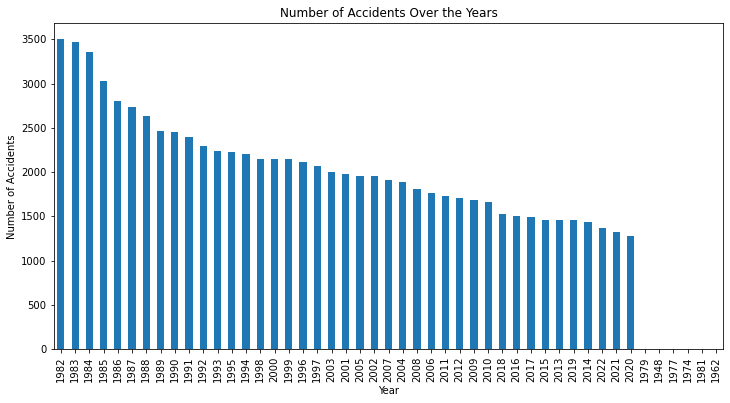

In [616]:
yearly_data = cleaned_aviation_df['event_year'].value_counts()

# Create plot
plt.figure(figsize=(12, 6))
yearly_data.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over the Years')
plt.show()


* The number of accidents and incidents decreased significantly over the the years.

## Aircraft Engine type and number

This analysis tries to find out how aircrats number and tyepes of engines are related to the number

of accidents and to the level of injuries and damge to aircraft 

I use the value counts of some of the main variables for vizualization of which ones involved more in accidents


### Engine Type
#### Number of accidents by Engine Types

I find out how the rumber of accidents relate to engine type of aircrafts

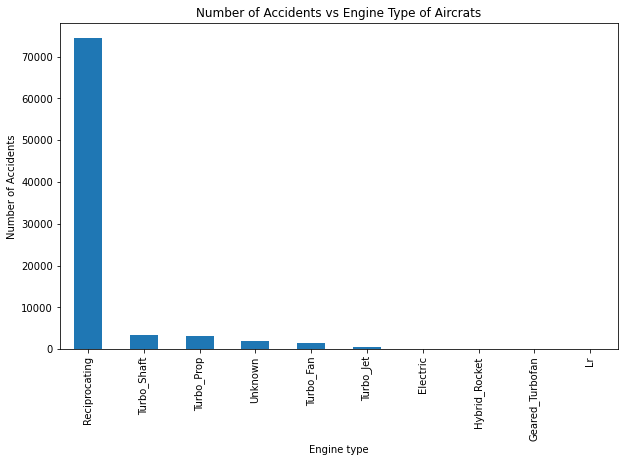

In [618]:
#Type of engine
# used .value_counts() to count the number of accidents
engines_type_data = cleaned_aviation_df['engine_type'].value_counts()

# Create plot
plt.figure(figsize=(10, 6))
engines_type_data.plot(kind='bar')
plt.xlabel('Engine type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents vs Engine Type of Aircrats')
plt.show()


### Number of Engines
#### Number of accidents by Engine Number

I find out how the rumber of accidents relate to number of engines of aircrafts


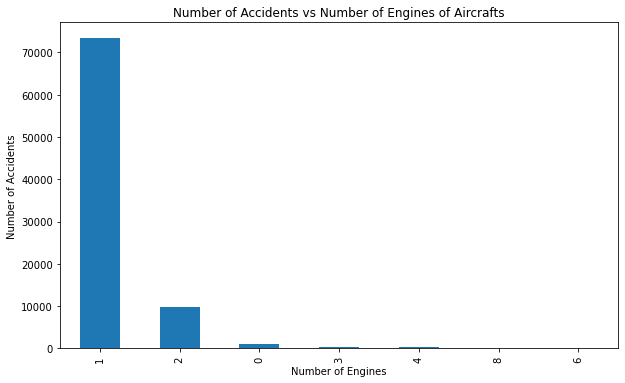

In [619]:
#Number of engines
# used .value_counts() to count the number of accidents
engines_num_data = cleaned_aviation_df['number_of_engines'].value_counts()

# Create plot
plt.figure(figsize=(10, 6))
engines_num_data.plot(kind='bar')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents vs Number of Engines of Aircrafts')
plt.show()


* As engine number of aircrafts have increases the number of accidents decreases. 
* Aircrafts with some engine types such as Reciprocating are involved in the highest number of accidents.
  

### Groupby Enigine Type and Number 
#### `Total injuries` by `Number of Engines` and `Engine Types`
I find out how the rumber of accidents/total injuries relate to combination of the two factors

In [620]:
# groupby 'engine_type' and 'number of engines' and aggregate them to get 'total-injuries'
grouped_by_type_num_engine = cleaned_aviation_df.groupby(by=['number_of_engines', 'engine_type'])[['total_injuries']].agg(len)
grouped_by_type_num_engine

total_injuries
number_of_engines engine_type                    
0                 Reciprocating             468.0
                  Unknown                   620.0
1                 Electric                    5.0
                  Hybrid_Rocket               1.0
                  Reciprocating           67566.0
                  Turbo_Fan                  74.0
                  Turbo_Jet                 106.0
                  Turbo_Prop               1515.0
                  Turbo_Shaft              2971.0
                  Unknown                  1186.0
2                 Geared_Turbofan             1.0
                  Reciprocating            6238.0
                  Turbo_Fan                1073.0
                  Turbo_Jet                 330.0
                  Turbo_Prop               1576.0
                  Turbo_Shaft               461.0
                  Unknown                    11.0
3                 Reciprocating              15.0
                  Turbo_Fan                 238.0
                  Turbo_Jet                  67.0
                  Turbo_Shaft                 1.0
4                 Electric                    2.0
                  Reciprocating              72.0
                  Turbo_Fan                 162.0
                  Turbo_Jet                  32.0
                  Turbo_Prop                 32.0
                  Unknown                     4.0
6                 Reciprocating               1.0
8                 Electric                    1.0
                  Lr                          1.0

* Aircrafts with certain engine types are more involved in accidents than the others. This mainly refers to engine type `Reciprocating` 
* It also shows that as the number of engines the aircrafts have increases the number of accidents and dncreases.
* Aircrafts with a combination of 1 engine and of `Reciprocating` type are highly involved in accidents with large number of injuries than the other combiations

## Make and Model

### Make of Aircrafts
I figure out how Make of aircrafts relates to number of accidents.

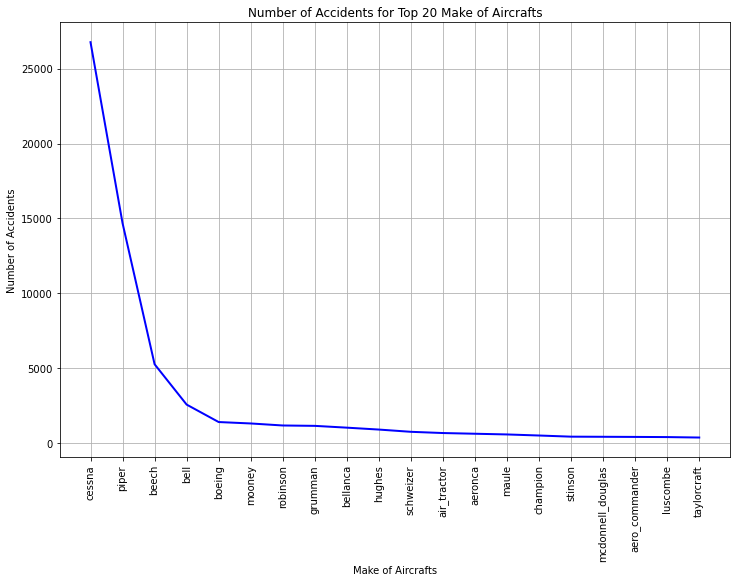

In [621]:
# use .value_counts to get the top_20_Make_accidents becouse of large number of makes
top_20_make_accidents = cleaned_aviation_df['make'].value_counts().head(20)

# Create plot
plt.figure(figsize=(12, 8))
plt.plot(top_20_make_accidents.index, top_20_make_accidents.values, linestyle='-', linewidth=2.0, color='blue')
plt.xlabel('Make of Aircrafts')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents for Top 20 Make of Aircrafts')
plt.xticks(rotation=90)
plt.grid()
plt.show()


### Groupby Make and Model
I figure out which Models of Make of aircrafts relates to high total injuries caused by aircrafts

In [622]:
#groupby 'make' and 'model' and aggregate them to get 'total-injuries'
grouped_by_make_and_model = cleaned_aviation_df.groupby(by=['make', 'model'])[['total_injuries']].agg(len).reset_index()

#sort it in decending order to get the top make and model combination with high total injuries
grouped_by_make_and_model = grouped_by_make_and_model.sort_values(by='total_injuries', ascending=False)
grouped_by_make_and_model.head(10)

,make,model,total_injuries
4177,cessna,152,2349.0
4201,cessna,172,1717.0
4252,cessna,172n,1146.0
12659,piper,pa-28-140,925.0
4150,cessna,150,817.0
4250,cessna,172m,794.0
4255,cessna,172p,684.0
4308,cessna,182,651.0
4285,cessna,180,620.0
4176,cessna,150m,583.0



***
* Make of aircrafts is one of the most important variables in this analysis
* Aircraft Make sush as Cessna and its Models such as 152 and 172 are shown to be involved in more accidents causing more total injuries than others..
***

#### Groupby Make and Number of Engines

In [573]:
#groupby 'make' and 'engine_number' and aggregate them to get 'total-injuries'
grouped_by_make_and_egnine_num = cleaned_aviation_df.groupby(by=['make','number_of_engines'])[['total_injuries']].agg(len).reset_index()

#sort it in decending order to get the top make and engine_number combination with high total injuries
grouped_by_make_and_egnine_num = grouped_by_make_and_egnine_num.sort_values(by='total_injuries', ascending=False)
grouped_by_make_and_egnine_num.head(10)

,make,number_of_engines,total_injuries
1316,cessna,1,24479.0
5454,piper,1,12542.0
665,beech,1,3333.0
688,bell,1,2438.0
1317,cessna,2,2247.0
5455,piper,2,2097.0
666,beech,2,1928.0
4917,mooney,1,1318.0
5951,robinson,1,1185.0
2960,grumman,1,1070.0


* Aircraft Make sush as Cessna and Piper with 1 engine are shown to be involved in more accidents causing more total injuries than others.

### Groupby Make and Engine Types

In [623]:
#groupby 'make' and 'engine_type' and aggregate them to get 'total-injuries'
grouped_by_make_and_egnine_type = cleaned_aviation_df.groupby(by=['make', 'engine_type'])[['total_injuries']].agg(len).reset_index()

#sort it in decending order to get the top make and engine_type combination with high total injuries
grouped_by_make_and_egnine_type = grouped_by_make_and_egnine_type.sort_values(by='total_injuries', ascending=False)
grouped_by_make_and_egnine_type.head(10)

,make,engine_type,total_injuries
1356,cessna,Reciprocating,26090.0
5549,piper,Reciprocating,14390.0
687,beech,Reciprocating,4645.0
719,bell,Turbo_Shaft,1571.0
5010,mooney,Reciprocating,1317.0
6054,robinson,Reciprocating,1153.0
3021,grumman,Reciprocating,1081.0
752,bellanca,Reciprocating,1035.0
715,bell,Reciprocating,924.0
893,boeing,Reciprocating,693.0


* Aircraft Make sush as Cessna and Piper with Reciprocating engine are shown to be involved in more accidents causing more total injuries than others.

### Other Factors
* The effect of weather conditions is alanayzed here
* This is to see if other factors, other than those related to the aircraft, are the main causes of aircraft accidents

In [624]:
#value_counts for 'weather_condition'
weather_value_counts = cleaned_aviation_df['weather_condition'].value_counts()

print(f"Number of accidents by weather conditions: \n{weather_value_counts}")

Number of accidents by weather conditions: 
VMC    78116
IMC     5736
UNK      978
Name: weather_condition, dtype: int64


* There are more accidents during VMC (Visual Meteorological Conditions)(in good conditions) than IMC (Instrument Meteorological Conditions)(bad conditions) 
* This means weather conditions are not the major causes of aircraft accidents.
* Factors related to aircrafts are more important than external factors

## Conclusions
This analysis leads to three recommendations for the decision to purchase of aircraft with the lowest risk 
* Consider buying aircrafts with a greater number of engines and engines types which are with the lowest accidents recorded. Aircrafts with engine types such as Reciprocating must be avoided.
* Aircrafts Make and Models must be highly regarded during aircraft purchase. Make and Models such as Cessna and its Models 152 and 172 which are shown to be more involved in accidents than others must be avoided.
* Most importantly, avoid some combination of factors such as Cessna Make, Reciprocating type and one engine which has the highest number of accidents and injuries recorded..
* Aircrafts with the least number of accident records in this dataset are not considered to be with lowest risk in this analysis because this can probably be due to their low level of operation which in turn reduce the chance of accidents.
* This project can be improved by taking a dataset of accidents by highly and equally operational aircrafts in the world and finding out the ones with the lowest accident. 